In [31]:
# Importar las librerías

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importar el dataset

dataset = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
# necesito todos los atributos menos el último que es la clase -> etiqueta que no necesitamos porque los som no son supervisados (0= solicitud aprobada; 1= solicitud no aprobada)
X = dataset.iloc[:,:-1].values # Tengo 15 columnas pero la primera no la considero (ID del cliente). La dejo sólo para saber de quién se trata
y = dataset.iloc[:,-1].values

In [5]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [6]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [7]:
# Escalado de las características

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler (feature_range= (0,1))
X= sc.fit_transform(X)

In [8]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [9]:
pip install minisom


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=minisom-2.3.5-py3-none-any.whl size=12132 sha256=99a5fc537c6d602ef554e69e693d83906fa2355f88750924df1d1d246c1a8c60
  Stored in directory: c:\users\srmjf\appdata\local\pip\cache\wheels\be\33\77\b6bb14008fa79a2dd2b79d565e941d5faa2d7f7526e528345b
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'minisom' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'minisom'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [10]:
from minisom import MiniSom


In [11]:
som = MiniSom(x = 10, y =10, input_len= 15, sigma = 1.0, learning_rate= 0.5) #porque quiero una cuadrícula de  10 filas y 10 columnas
# sigma -> radio inicial. Por defecto =1. Luego se va actualizando en el interior del propio algoritmo
# learning_rate=0.5 . Capacidad de ir adaptando el valor de los pesos de una iteración a la siguiente. Por defecto. Puedo ser más alto. Aprenderá más rápido pero puede pasarse de frenada
# decay_function = none -> Función de desintegración se puede usar para mejorar la convergencia

In [12]:
# Hay que inicializar el vector de pesos a números pequeños cercanos a cero (pero no 0)
som.random_weights_init(X)


In [14]:
# Proceder al entrenamiento
som.train_random(data = X, num_iteration = 100)

In [15]:
# Visualizar los resultados
from pylab import bone, pcolor, colorbar, plot, show

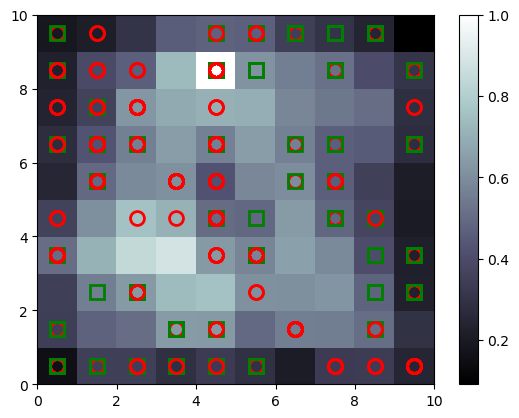

In [27]:
# bone me permite establecer la ventana de dibujo
bone()
# Detectar los nodos ganadores del mapa
#pcolor permite establecer un gradiente para poder agregar colores de distancias medias
# para obtener las disstancias -> método de las distancias entre las neuronas
#Las distancias vienen en columna y las necesito en fila -> transponer
pcolor(som.distance_map().T)
# Pintamos una leyenda
colorbar()

# a qué cliente/s corresponde el recuadro blanco?
markers =['o', 's'] # marcador círculo : o, cuadrado; s #primera opcion obtuvo autorización, segunda opción: no obtuvo la autorización
colors = ['r', 'g'] # los círculos serán rojos y los marcadores serán verde
for i, x in enumerate(X): # i para posición y x para valores específicos
    w = som.winner(x) # nodo ganador. Nos da fila y columna
    plot(w[0]+0.5,w[1]+0.5,
         markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor ='None', 
         markersize = 10, markeredgewidth =2) # sumo 0.5 para que el nodo ganador esté en el centro del cuadrado. Antes estaba en la esquina inferior  izquierda
show()

In [32]:
# encontrar los fraudes

mappings = som.win_map(X)
frauds= np.concatenate((mappings[(4,8)], mappings[(2,4)]), axis = 0) # va en tupla, ojo!

In [33]:
# desecalar los valores

frauds = sc.inverse_transform(frauds)

In [34]:
frauds

array([[1.5739548e+07, 0.0000000e+00, 2.2670000e+01, 7.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5699839e+07, 0.0000000e+00, 2.8170000e+01, 5.8500000e-01,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.6000000e+02, 1.0050000e+03],
       [1.5648069e+07, 0.0000000e+00, 2.4500000e+01, 1.7500000e+00,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.3200000e+02, 1.0000000e+00],
       [1.5731586e+07, 0.0000000e+00, 2.9500000e+01, 2.0000000e+00,
        1.0000000e+00, 1.0000000e+01, 8.0000000e+00, 2.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,